In [20]:
!pip install wordcloud -q
!pip install seaborn -q

No se esperaba & en este momento.
No se pudo analizar el valor especificado en una clave del Registro de ejecuci�n autom�tica.
No se esperaba & en este momento.
No se pudo analizar el valor especificado en una clave del Registro de ejecuci�n autom�tica.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [22]:
df = pd.read_csv("email.csv", encoding="ISO-8859-1")

In [23]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
df["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [25]:
grouped = df.groupby("Category").count()
grouped

,Message
Category,
ham,4825
spam,747


<Axes: >

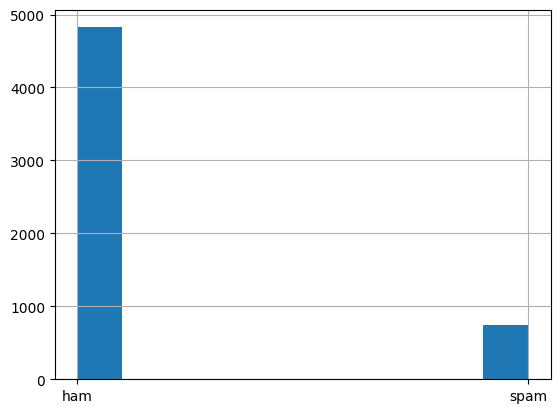

In [26]:
df["Category"].hist()

binarizar los datos para que 0 sea no spam y 1 sea spam

In [27]:
df["b_categorys"] = df["Category"].map({"ham":0, "spam": 1})
Y = df["b_categorys"].to_numpy()

In [28]:
df

,Category,Message,b_categorys
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ã¼ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [29]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
df_train, df_test, Ytrain, Ytest = train_test_split(
    df["Message"], Y , test_size=0.33
)

In [31]:
df_train

985                          Yo guess what I just dropped
229     Life is more strict than teacher... Bcoz Teach...
2163    1) Go to write msg 2) Put on Dictionary mode 3...
2340    Cheers for the message Zogtorius. IÂve been s...
3558          I had it already..sabarish asked me to go..
                              ...                        
2520           Ok. I only ask abt e movie. U wan ktv oso?
4942    Omg you can make a wedding chapel in frontierv...
391                             Huh so late... Fr dinner?
2133    Your B4U voucher w/c 27/03 is MARSMS. Log onto...
2817    Genius what's up. How your brother. Pls send h...
Name: Message, Length: 3733, dtype: object

In [32]:
df_test

5126    To the wonderful Okors, have a great month. We...
3224                    Well that must be a pain to catch
339                                Sorry, I'll call later
5462    Txt: CALL to No: 86888 & claim your reward of ...
2199                       I'm in a movie. Call me 4 wat?
                              ...                        
725     The world is running and i am still.maybe all ...
4381    Done it but internet connection v slow and can...
3443    Save money on wedding lingerie at www.bridal.p...
4585    Noooooooo please. Last thing I need is stress....
4857         yes baby! I need to stretch open your pussy!
Name: Message, Length: 1839, dtype: object

In [33]:
vectores = CountVectorizer(decode_error="ignore")
Xtrain = vectores.fit_transform(df_train)
Xtest = vectores.transform(df_test)

In [34]:
Xtrain

<3733x7163 sparse matrix of type '<class 'numpy.int64'>'
	with 49207 stored elements in Compressed Sparse Row format>

In [35]:
Xtest

<1839x7163 sparse matrix of type '<class 'numpy.int64'>'
	with 23259 stored elements in Compressed Sparse Row format>

crear el modelo

In [36]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train accu:", model.score(Xtrain, Ytrain))
print("test accu:", model.score(Xtest, Ytest))

train accu: 0.9930350924189659
test accu: 0.9847743338771071


In [37]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.9722814498933902
test F1: 0.9467680608365019


matriz de confusion

In [42]:
cm_train = confusion_matrix(Ytrain, Ptrain)
cm_train

array([[3251,    9],
       [  17,  456]], dtype=int64)

In [43]:
cm_test = confusion_matrix(Ytest, Ptest)
cm_test

array([[1562,    3],
       [  25,  249]], dtype=int64)

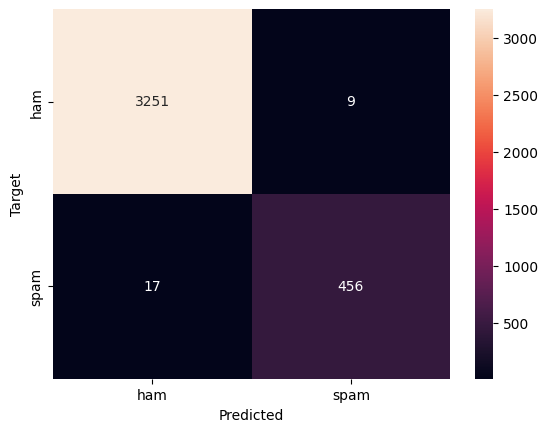

In [44]:
def plot_cm(cm):
    classes = ["ham", "spam"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(cm_train)

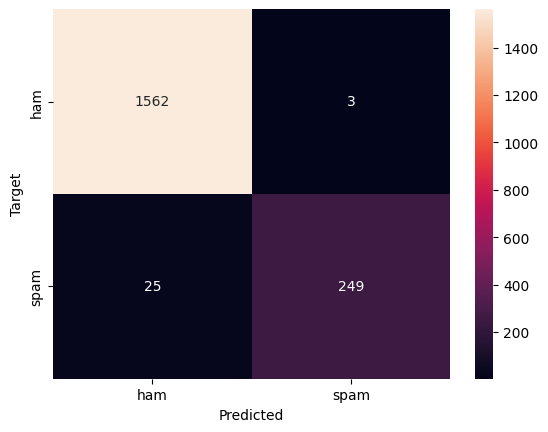

In [45]:
plot_cm(cm_test)

In [47]:
def visualize(category):
    words = ""
    for msg in df[df["Category"] == category]["Message"]:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show

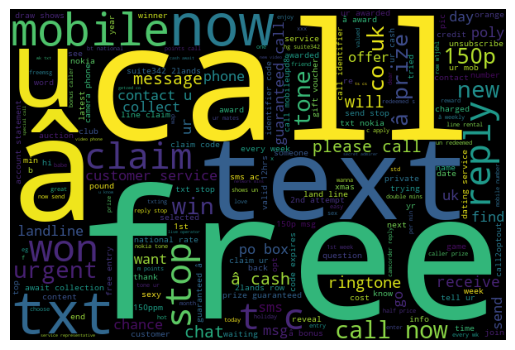

In [48]:
visualize("spam")

transformacion de datos a vectores

In [49]:
X = vectores.transform(df["Message"])
df["predictions"] = model.predict(X)
df

,Category,Message,b_categorys,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0


In [51]:
falso_spam = df[(df["predictions"] == 1) &(df["b_categorys"] == 0)]["Message"]
for msg in falso_spam:
    print(msg)

Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


In [52]:
falso_real = df[(df["predictions"] == 0) &(df["b_categorys"] == 1)]["Message"]
for msg in falso_real:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
Did you hear about the new "Divorce Barbie"? It comes with all of Ken's stuff!
#ERROR!
SMS. ac sun0819 posts HELLO:"You seem cool, wanted to say hi. HI!!!" Stop? Send STOP to 62468
#ERROR!
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Filthy stories and GIRLS waiting for your
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx CallsÂ£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U L